# Selection of starting high and low topographies for CASCADE CNH

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import csv

sys.path.extend(['/Users/KatherineAnardeWheels/PycharmProjects/Barrier3D', '/Users/KatherineAnardeWheels/PycharmProjects/brie', '/Users/KatherineAnardeWheels/PycharmProjects/CASCADE'])

import scripts.CASCADE_plotters as cplt

datadir = "/Users/KatherineAnardeWheels/Research/BARis/UNC/CNH/CASCADE_save_dir/Run_Output/"

## High dune growth rate (r_ave=0.75)

Use storm sequence #4 (doesn't drown over 10k years), find the maximum and minimum average interior elevations, and save the barrier topographies corresponding to these time periods. Start with the run output from the 0.75 average dune growth rate.

In [2]:
ib3d = 0
tmin = 0
tmax = 10000

name_prefix = "4-CASCADE_noAST_Rave_pt75_SLR_pt004_10k-yrs_04"
output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
cascade = output["cascade"][0]
(
    BarrierWidth_75,
    DuneCrestMean_75,
    BarrierHeight_75,
    bw_rate_75,
    bh_rate_75,
    sc_rate_75,
    DuneCrestMin_75,
    DuneCrestMax_75,
) = cplt.plot_nonlinear_stats(cascade.barrier3d, ib3d, tmin, tmax)

ModuleNotFoundError: No module named 'cascade.beach_nourisher'

In [3]:
print("min barrier height = " + str(np.min(BarrierHeight_75)) + " m NAVD88") 
i_min_pt75 = np.argmin(BarrierHeight_75)
print("index = " + str(i_min_pt75)) 
print("corresponding barrier width = " + str(BarrierWidth_75[i_min_pt75]) + " m") 
print("-------------") 
print("max barrier height = " + str(np.max(BarrierHeight_75)) + " m NAVD88") 
i_max_pt75 = np.argmax(BarrierHeight_75)
print("index = " + str(i_max_pt75)) 
print("corresponding barrier width = " + str(BarrierWidth_75[i_max_pt75]) + " m") 

min barrier height = 0.17273676105106295 m NAVD88
index = 5790
corresponding barrier width = 108.60000000000014 m
-------------
max barrier height = 1.4635104609493292 m NAVD88
index = 829
corresponding barrier width = 324.1999999999999 m


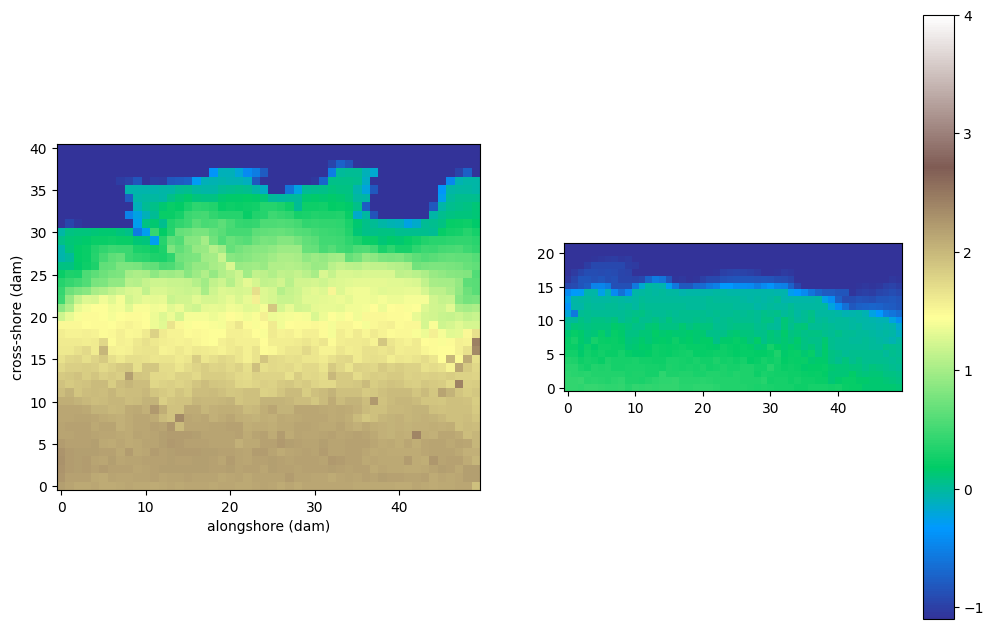

In [4]:
fig=plt.figure(figsize=(12,8), dpi= 100)
plt.subplot(1,2,1)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_max_pt75] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=4.0,
)
plt.xlabel("alongshore (dam)")
plt.ylabel("cross-shore (dam)")

plt.subplot(1,2,2)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_min_pt75] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=4.0,
)
plt.colorbar()

So the minimum interior elevation cannot support a roadway because the roadway borders "water" cells immediately upon construction (0 m NAVD88 in the code is the bay drowning threshold). I'm just going to have to explain this in the text. Instead, we chose another low elevation, at index 3284, which is slightly higher in elevation behind the dune line and a slightly wider barrier island (more realistic for initial roadway construction or dune management to maintain a roadway).

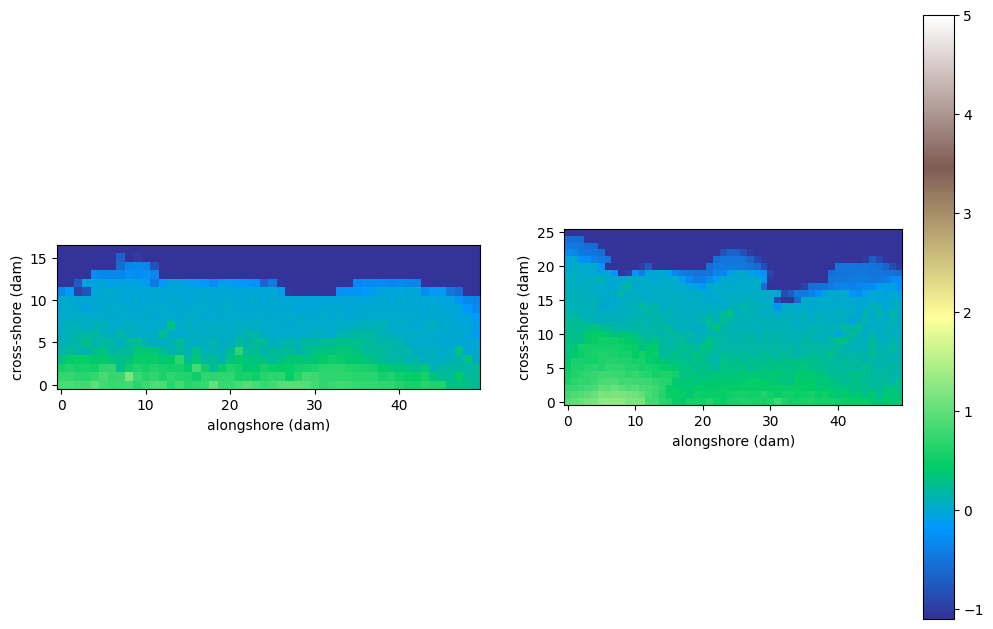

In [5]:
fig=plt.figure(figsize=(12,8), dpi= 100)

i_min_pt75 = 4023

plt.subplot(1,2,1)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_min_pt75] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=5.0,
)
plt.xlabel("alongshore (dam)")
plt.ylabel("cross-shore (dam)")

#i_min_pt75 = 4257
i_min_pt75 = 3284  # the next lowest all have similar ave elevations, but this one because is slightly wider

plt.subplot(1,2,2)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_min_pt75] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=5.0,
)
plt.xlabel("alongshore (dam)")
plt.ylabel("cross-shore (dam)")
plt.colorbar()

In [6]:
print("final min index = " + str(i_min_pt75)) 
print("min barrier height = " + str(BarrierHeight_75[i_min_pt75]) + " m NAVD88") 
print("corresponding barrier width = " + str(BarrierWidth_75[i_min_pt75]) + " m") 

final min index = 3284
min barrier height = 0.28163085024602985 m NAVD88
corresponding barrier width = 163.60000000000014 m


In [7]:
with open("b3d_pt75_829yrs_high-elevations.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(cascade.barrier3d[ib3d].DomainTS[i_max_pt75])  # save in decameters
with open("b3d_pt75_829yrs_high-dunes.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(
        cascade.barrier3d[ib3d].DuneDomain[i_max_pt75, :, 0]
    )  # save in decameters, just first row (just in case, not sure if I will ever use this)
with open("b3d_pt75_3284yrs_low-elevations.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(cascade.barrier3d[ib3d].DomainTS[i_min_pt75])  # save in decameters
with open("b3d_pt75_3284yrs_low-dunes.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(
        cascade.barrier3d[ib3d].DuneDomain[i_min_pt75, :, 0]
    )  # save in decameters, just first row (just in case, not sure if I will ever use this)

## Low dune growth rate (r_ave = 0.45)

Now move on to the 0.45 average dune growth rate.

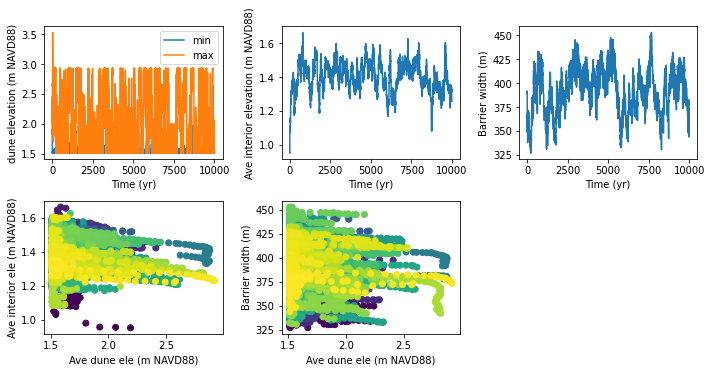

In [8]:
ib3d = 0
tmin = 0
tmax = 10000

name_prefix = "4-CASCADE_noAST_Rave_pt45_SLR_pt004_10k-yrs_04"
output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
cascade = output["cascade"][0]
(
    BarrierWidth_45,
    DuneCrestMean_45,
    BarrierHeight_45,
    bw_rate_45,
    bh_rate_45,
    sc_rate_45,
    DuneCrestMin_45,
    DuneCrestMax_45,
) = cplt.plot_nonlinear_stats(cascade.barrier3d, ib3d, tmin, tmax)

In [9]:
print("min barrier height = " + str(np.min(BarrierHeight_45)) + " m NAVD88") 
i_min_pt45 = np.argmin(BarrierHeight_45)
print("index = " + str(i_min_pt45)) 
print("corresponding barrier width = " + str(BarrierWidth_45[i_min_pt45]) + " m") 
print("-------------") 
print("max barrier height = " + str(np.max(BarrierHeight_45)) + " m NAVD88") 
i_max_pt45 = np.argmax(BarrierHeight_45)
print("index = " + str(i_max_pt45)) 
print("corresponding barrier width = " + str(BarrierWidth_45[i_max_pt45]) + " m") 

min barrier height = 0.952506801327883 m NAVD88
index = 2
corresponding barrier width = 390.2000000000001 m
-------------
max barrier height = 1.664586704899139 m NAVD88
index = 802
corresponding barrier width = 378.19999999999993 m


The minimum doesn't work here (model spin up), so need to manually select the minimum later in the time series. Note that the barrier widths are really similar between the high and low scenarios. Not as much variability in width and height for the 0.45 case. Also note that the barrier widths for the 0.45 case are similar to the high elevation 0.75 scenario (324 m).

In [10]:
i_min_pt45 = 8750
print("final min index = " + str(i_min_pt45)) 
print("min barrier height = " + str(BarrierHeight_45[i_min_pt45]) + " m NAVD88") 
print("corresponding barrier width = " + str(BarrierWidth_45[i_min_pt45]) + " m") 

final min index = 8750
min barrier height = 1.0902231574973429 m NAVD88
corresponding barrier width = 388.2000000000005 m


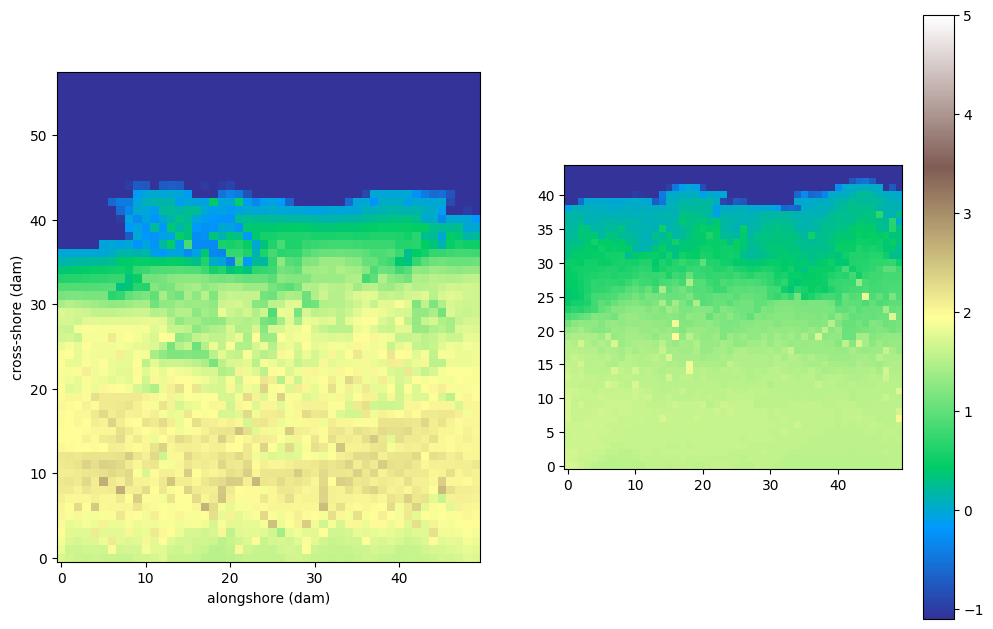

In [13]:
fig=plt.figure(figsize=(12,8), dpi= 100)
plt.subplot(1,2,1)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_max_pt45] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=5.0,
)
plt.xlabel("alongshore (dam)")
plt.ylabel("cross-shore (dam)")

plt.subplot(1,2,2)
plt.imshow(
    cascade.barrier3d[0]._DomainTS[i_min_pt45] * 10,
    origin="lower",
    cmap="terrain",
    vmin=-1.1,
    vmax=5.0,
)
plt.colorbar()

In [12]:
with open("b3d_pt45_802yrs_high-elevations.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(cascade.barrier3d[ib3d].DomainTS[i_max_pt45])  # save in decameters
with open("b3d_pt45_802yrs_high-dunes.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(
        cascade.barrier3d[ib3d].DuneDomain[i_max_pt45, :, 0]
    )  # save in decameters, just first row (just in case, not sure if I will ever use this)
with open("b3d_pt45_8750yrs_low-elevations.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(cascade.barrier3d[ib3d].DomainTS[i_min_pt45])  # save in decameters
with open("b3d_pt45_8750yrs_low-dunes.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(
        cascade.barrier3d[ib3d].DuneDomain[i_min_pt45, :, 0]
    )  # save in decameters, just first row (just in case, not sure if I will ever use this)